<a href="https://www.kaggle.com/code/shwe1122/stock-market-prediction?scriptVersionId=141651311" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import chart_studio.plotly as py
import plotly.graph_objs as go
# from plotly_offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [3]:
tesla=pd.read_csv('/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv')
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
tesla['Date']=pd.to_datetime(tesla['Date'])

In [6]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2017-03-17 00:00:00
Total days = 2453 days


In [7]:
tesla.describe()

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187


<Axes: >

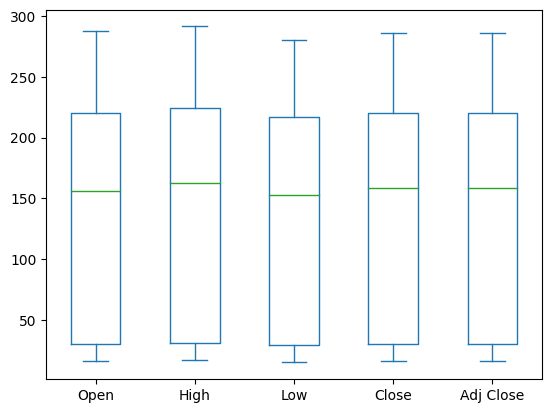

In [8]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [9]:
# Stteing the layout for our plot
layout = go.Layout(
title='Stock Prices of Tesla',xaxis=dict(title='Date',titlefont=dict(
family='Courier New,monospace',size=18,color='#7f7f7f')
                                        ),
    yaxis=dict(title='Price',
              titlefont=dict(family='Courier New,monospace',size=18,color='#7f7f7f')
              )
)

tesla_data=[{'x':tesla['Date'], 'y':tesla['Close']}]
plot=go.Figure(data=tesla_data,layout=layout)

In [10]:
iplot(plot)

In [11]:
# Building the regression model
from sklearn.model_selection import train_test_split

# For preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [12]:
# split the data into train and test sets
x=np.array(tesla.index).reshape(-1,1)
y=tesla['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [13]:
# Feature Scaling
scaler = StandardScaler().fit(x_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
# Plot actual and predicted values for train dataset
trace0=go.Scatter(
x=x_train.T[0],
y=y_train,
mode='markers',
name='Actual')

trace1=go.Scatter(
x=x_train.T[0],
y=model.predict(x_train).T,
mode='lines',
name='Predicted')

tesla_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data,layout=layout)

In [17]:
iplot(plot2)

In [18]:
# Calculate scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,model.predict(x_train))}\t{r2_score(y_test,model.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train,model.predict(x_train))}\t{mse(y_test,model.predict(x_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.7932524122226075	0.7951980134146517
MSE       1833.9196066020397	1823.143839819531



In [19]:
data=pd.read_csv('/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv')

In [20]:
data['Close']=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [21]:
sc=MinMaxScaler(feature_range=(0,1))
trainData= sc.fit_transform(trainData)
trainData.shape

(1692, 1)

In [22]:
x_train=[]
y_train=[]
for i in range (60,1149):
    x_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)    

In [23]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))#adding the batch_size axis
x_train.shape

(1089, 60, 1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [25]:
hist=model.fit(x_train,y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
35/35 - 16s - loss: 0.0181 - 16s/epoch - 460ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0034 - 7s/epoch - 207ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0055 - 7s/epoch - 213ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0031 - 7s/epoch - 206ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0033 - 7s/epoch - 202ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0029 - 7s/epoch - 205ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0051 - 7s/epoch - 212ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0033 - 7s/epoch - 201ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0026 - 7s/epoch - 202ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0027 - 7s/epoch - 204ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0023 - 7s/epoch - 207ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0031 - 7s/epoch - 202ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0025 - 7s/epoch - 201ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0040 - 7s/epoch - 200ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0032 - 7s/epoch - 201ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0022 - 7s/epoch - 209ms/step
Epoch 17/20
35/

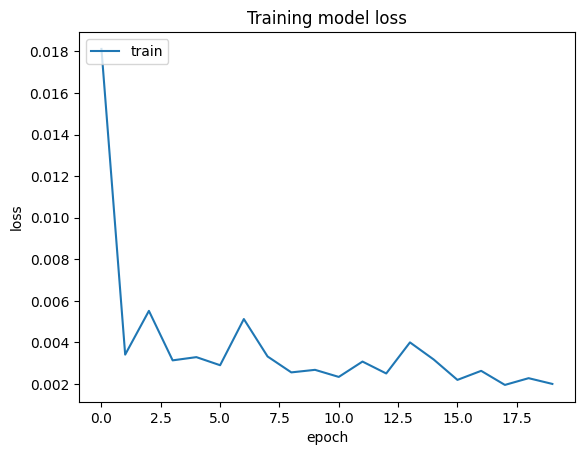

In [26]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN, GRU, BatchNormalization
import math
from sklearn.model_selection import train_test_split



dataset=pd.read_csv('/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv',index_col='Date', parse_dates=True)

In [28]:
data = dataset[['Close']]
data.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [29]:
scaler=MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [30]:
timesteps=60
features=1

In [31]:
def split_data(data,timesteps,data_len):
    x,y=[],[]
    for i in range(timesteps,data_len):
        x.append(data[i-timesteps:i,:])
        y.append(data[i,:])
    return np.asarray(x),np.asarray(y)

In [32]:
data_train,data_test=train_test_split(data,test_size=0.2,shuffle=False)
data_train,data_valid=train_test_split(data_train,test_size=0.2,shuffle=False)

print(data_train.shape,data_valid.shape,data_test.shape,sep='\n')

(1082, 1)
(271, 1)
(339, 1)


In [33]:
x_train,y_train=split_data(data_train,timesteps,data_train.shape[0])

x_test,y_test = split_data(data_test,timesteps,data_test.shape[0])

x_valid,y_valid = split_data(data_valid,timesteps,data_valid.shape[0])

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_valid.shape,x_valid.shape)

(1022, 60, 1) (1022, 1)
(279, 60, 1) (279, 1)
(211, 60, 1) (211, 60, 1)


In [34]:
model=Sequential()
model.add(SimpleRNN(60,activation='relu',return_sequences=True,input_shape=(timesteps,features)))
model.add(BatchNormalization())
model.add(SimpleRNN(60,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(60))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [35]:
model.fit(x_train, y_train, batch_size=32, epochs=200, validation_data=(x_valid, y_valid))

Epoch 1/200
32/32 [==============================] - 5s 48ms/step - loss: 0.3710 - mae: 0.3953 - val_loss: 0.2551 - val_mae: 0.4975
Epoch 2/200
32/32 [==============================] - 1s 36ms/step - loss: 0.0412 - mae: 0.1498 - val_loss: 0.3240 - val_mae: 0.5620
Epoch 3/200
32/32 [==============================] - 1s 33ms/step - loss: 0.0308 - mae: 0.1295 - val_loss: 0.3164 - val_mae: 0.5567
Epoch 4/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0183 - mae: 0.1007 - val_loss: 0.2961 - val_mae: 0.5376
Epoch 5/200
32/32 [==============================] - 1s 35ms/step - loss: 0.0207 - mae: 0.0959 - val_loss: 0.2840 - val_mae: 0.5263
Epoch 6/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0175 - mae: 0.0946 - val_loss: 0.3073 - val_mae: 0.5488
Epoch 7/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0124 - mae: 0.0802 - val_loss: 0.2777 - val_mae: 0.5211
Epoch 8/200
32/32 [==============================] - 1s 35ms/step - loss: 0.

In [36]:
mse,mae=model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 11ms/step - loss: 0.0023 - mae: 0.0419


In [37]:
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

9/9 [==============================] - 0s 11ms/step


In [38]:
rmse = np.sqrt(((y_test - y_pred)**2).mean())
rmse

12.839526741968418

In [39]:
import math
def report(y_test,y_pred):
    print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))
    print("MSE: ", mean_squared_error(y_test,y_pred))
    print("MAE: ", mean_absolute_error(y_test,y_pred))
    print("Explained variance regression score:", 
          explained_variance_score(y_test, y_pred))
    print('R2: ', r2_score(y_test, y_pred))

In [40]:
report(y_test,y_pred)

RMSE:  12.839526741968418
MSE:  164.85344695772216
MAE:  11.332520389830448
Explained variance regression score: 0.9377229387392237
R2:  0.7466284857067662


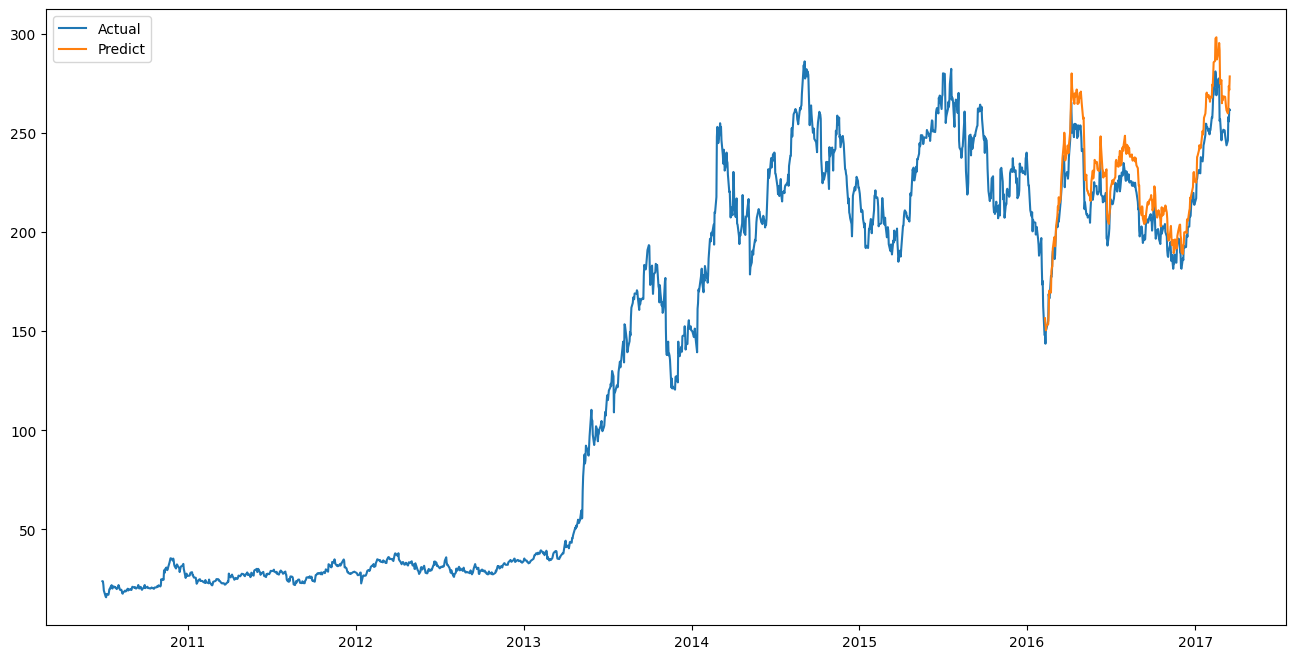

In [41]:
actual = dataset[['Close']]

pred   = dataset[['Close']].iloc[data.shape[0] - y_pred.shape[0]:, :]

pred[['Predict']] = y_pred
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual')
plt.plot(pred[['Predict']], label='Predict')
plt.legend()
plt.show()